# Introduction
Intro to Linear Regression Scratch
Let's create a class of linear regression from scratch. We will implement the algorithm using only the minimum libraries such as NumPy.



In [1]:
# predefines and imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [25]:
# Prototype Linear reg
class ScratchLinearRegression():
    """
    
    
    Parameters
    ----------
    num_iter : int
      
    lr : float #learning rate
      
    no_bias : bool
      
    verbose : bool
      
    
    Attributes
    ----------
    self.coef_ : 
      
    self.loss : 
      
    self.val_loss : 
      
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # 
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def add_bias(self,data):
            if self.no_bias: return data
            bias = np.ones((data.shape[0],1))
            return np.hstack((bias,data))
        
    def fit(self, X, y, X_val=None, y_val=None):
        if self.verbose: print(X.shape)
        bias_X = self.add_bias(X)
        k = bias_X.shape[-1]
        self.coef_ = np.zeros(k)
        
        validation = not X_val is None
        if validation: X_val_bias = self.add_bias(X_val)
        for i in range(self.iter):
            loss = self._objective_func(bias_X,y)
            self.loss[i] = loss
            if validation:
                v_loss = self._objective_func(X_val_bias,y_val)
                self.val_loss[i] = v_loss
            self._gradient_descent(bias_X,y)
        
    def predict(self, X):
        if self.no_bias:
            return self._linear_hypothesis(X)
        return self._linear_hypothesis(self.add_bias(X))
    def _linear_hypothesis(self, X):
            return X @ self.coef_
    def _gradient_descent(self, X, y):
        gradient = self._gradient(X,y)
        self.coef_ = self.coef_ - self.lr * gradient
    def _gradient(self,X,y):
        return X.T @ (self._linear_hypothesis(X) - y) / X.shape[0]
    def _objective_func(self,X,y):
        return MSE(self._linear_hypothesis(X),y) / 2
    def plot_learning_curve(self):
        plt.plot(self.loss, label = 'Train Loss')
        plt.plot(self.val_loss, label = 'Val Loss')
        plt.legend()
        plt.show()
    
def MSE(y_pred, y):
    """
    
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      
    y : 次の形のndarray, shape (n_samples,)
      
    Returns
    ----------
    mse : numpy.float
      
    """
    n = y.shape[0]
    return ((y-y_pred)**2).sum()/n

# Problem 1
Hypothetical function

In [13]:
# test p1
def testp1():
    model = ScratchLinearRegression(100,0.01,None,True)
    model.coef_ = np.array([0.5,0.5,0.1,2])
    x = np.array([1,3,5,2])
    print(model._linear_hypothesis(x))
testp1()

6.5


# Problem 2
Gradient Decent Method

In [14]:
def testp2():
    model = ScratchLinearRegression(10000,0.001,False,True)
    x = np.array([[1,3,5,2]]).T
    y = np.array([2,6,10,4])
    model.fit(x,y)
    print('pred x:', model.predict(x))
    print('final params: ', model.coef_)
testp2()

(4, 1)
pred x: [2.04755472 6.00904891 9.97054311 4.02830181]
final params:  [0.06680762 1.9807471 ]


# Problem 3
Predict

In [15]:
#already used in problem 2

# Problem 4
MSE

In [16]:
def testp3():
    model = ScratchLinearRegression(1000,0.001,False,True)
    x = np.array([[1,3,5,2]]).T
    y = np.array([2,6,10,4])
    model.fit(x,y)
    print('pred y:', model.predict(x))
    print('Real y:',y )
    print('MSE: ', MSE(y,model.predict(x)))
testp3()

(4, 1)
pred y: [2.30776053 6.05842174 9.80908294 4.18309114]
Real y: [ 2  6 10  4]
MSE:  0.04202533302409904


# Problem 5
Objective function

In [17]:
def testp5():
    model = ScratchLinearRegression(1000,0.001,False,True)
    x = np.array([[1,3,5,2]]).T
    y = np.array([2,6,10,4])
    model.fit(x,y)
    print('First losses: ', model.loss[:5])
    print('Last losses: ', model.loss[model.loss.shape[0] - 5:])
testp5()

(4, 1)
First losses:  [19.5        19.09166378 18.69189168 18.30050408 17.91732512]
Last losses:  [0.02105632 0.02104758 0.02103885 0.02103012 0.02102139]


# Problem 6
Learning and Estimation

In [18]:
house_data = pd.read_csv('../Data/Normal/houseprice_train.csv')
print(house_data.shape)
house_data.columns

(1460, 81)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
X = house_data[['LotArea', 'OverallQual', 'TotalBsmtSF', 'GrLivArea', 
                'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea']]
Y = house_data['SalePrice']


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X,Y)

def scratch_linear_testp6():
    model = ScratchLinearRegression(10000,0.001,False,True)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = MSE(y_pred,y_test)
    print('Scratch Result mse:',mse)
scratch_linear_testp6()

(1095, 7)
Scratch Result mse: 1431365578.4306357


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def sklearn_linear_testp6():
    linear = LinearRegression()
    linear.fit(x_train,y_train)
    y_pred = linear.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    print('Sklearn mse:', mse)
sklearn_linear_testp6()

Sklearn mse: 1432251281.8562305


# Problem 7
Plot learning curve

(1095, 7)


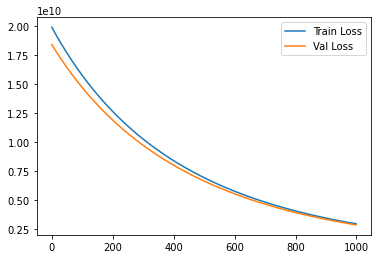

In [36]:
def testp7():
    model = ScratchLinearRegression(1000,0.001,False,True)
    model.fit(x_train,y_train,x_test,y_test)
    model.plot_learning_curve()
testp7()

# Problem 8
Remove bias terms

(1095, 7)


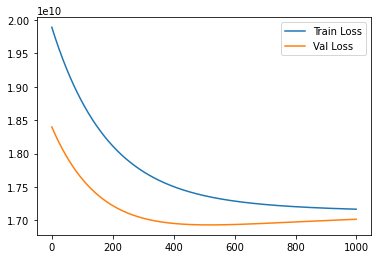

In [38]:
def testp8():
    model = ScratchLinearRegression(1000,0.001,True,True)
    model.fit(x_train,y_train,x_test,y_test)
    model.plot_learning_curve()
testp8()

### NOTE:
Seems that from removing the bias $\theta _0$, the model cant fit well anymore since we're removing one deg of freedom, which is the intercept, only allowing our model to 'rotate'

# Problem 9
Multidimensionalization of feature quantities

### NOTE:
I cant understand the requirement very well.

Though if it's trying to tell me to add more features, i've already done that!.

# Problem 10
Deriving Formula

![image](./gradient_des.jpg)

# Problem 11
Problem of local optimal solution

### NOTE: Problem 11
**So the question is how can gradient descent give optimal solution for linear regression but only local minima in many other cases?**

- I would argue that's because of the nature of the loss function of linear model.
- The objective function is mse, made from euclid distance, x^2
- It is continuous, has derivative and most importantly, only have one minima for each dimension.
- That's why the minima we find is always the best